In [2]:
## Import the neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Read the dataset
df = pd.read_csv(r"/home/pc/Documents/Growth_curve/Bank Marketing/bank+marketing/bank/bank-full.csv", delimiter=";")

In [4]:
## Seeing the top five data
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
## How many columns and rows 
df.shape

(45211, 17)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
## Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
## What is the most frequent observation (mode) for the column education?
df["education"].mode()
print(df["education"].value_counts())


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [12]:
## Create the correlation matrix for the numerical features of your dataset
corr_matrix = round(df[["age", "balance", 'day', 'campaign', 'pdays', 'previous']].corr(), 2)
corr_matrix

,age,balance,day,campaign,pdays,previous
age,1.00,0.10,-0.01,0.00,-0.02,0.00
balance,0.10,1.00,0.00,-0.01,0.00,0.02
day,-0.01,0.00,1.00,0.16,-0.09,-0.05
campaign,0.00,-0.01,0.16,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,-0.03,0.45,1.00


<Axes: >

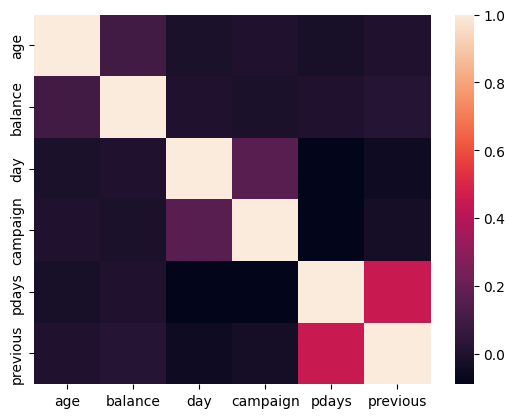

In [13]:
## Represent the correlation graphically
sns.heatmap(corr_matrix) ## pdays and previous have the highest correlation

In [14]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [15]:
print(df["y"].nunique())
print(df['y'].unique())

2
['no' 'yes']


In [16]:
## Target encoding
df['y'] = df["y"].map({'yes': 1, 'no': 0})

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [18]:
df['loan'] = df["loan"].map({'yes': 1, 'no': 0})
df["housing"] = df["housing"].map({'yes': 1, 'no': 0})

In [19]:
## split the data into train and test

X = df[["age", "balance","housing", "duration","campaign", "pdays"]]
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [22]:
## Predicting the model with test data
predict = model.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
## Checking how well the model predicted
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(round(accuracy_score(y_test, predict), 2))
report = classification_report(y_test, predict)
print(report)
print(confusion_matrix(y_test, predict))
##You can tell from the accuracy that the model is correcting predicting 0 and doing a terrible job with 1

0.89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11965
           1       0.59      0.20      0.30      1599

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564

[[11743   222]
 [ 1283   316]]


<Axes: xlabel='y'>

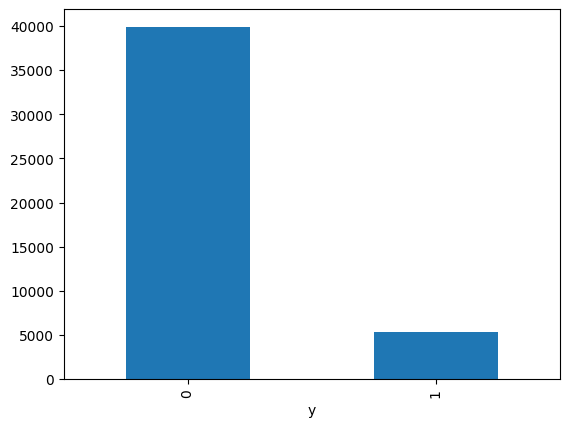

In [24]:
df['y'].value_counts().plot(kind='bar')  ## Reason: the model is more exposed to 0 variables which tells it's an imbalance dataset

In [ ]:
## downloading IMBLEARN for oversampling
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [26]:
## OVERSAMPLING 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(X, y)

In [27]:
x.shape, y.shape

((79844, 6), (79844,))

In [28]:
len(y[y == 0]), len(y[y == 1])

(39922, 39922)

In [29]:
df1 = pd.DataFrame(x)
df2 = pd.DataFrame(y)
df_oversample = pd.concat([df1, df2], axis=1)

In [30]:
df_oversample

,age,balance,housing,duration,campaign,pdays,y
0,58,2143,1,261,1,-1,0
1,44,29,1,151,1,-1,0
2,33,2,1,76,1,-1,0
3,47,1506,1,92,1,-1,0
4,33,1,0,198,1,-1,0
...,...,...,...,...,...,...,...
79839,66,685,0,261,1,384,1
79840,33,4875,0,529,4,-1,1
79841,49,12138,0,201,1,-1,1
79842,39,272,1,1344,1,-1,1


<Axes: xlabel='y'>

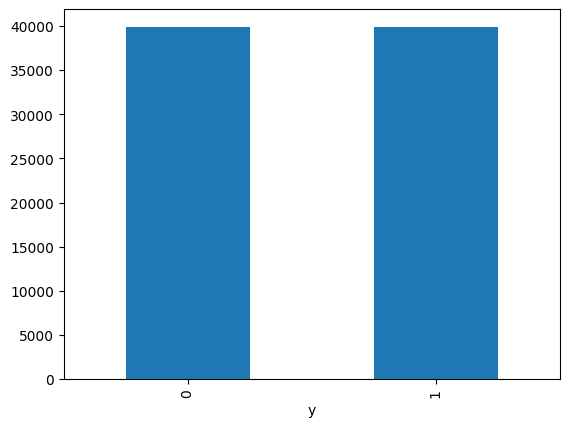

In [31]:
df2['y'].value_counts().plot(kind='bar')

In [32]:
x = df_oversample[["age", "balance","housing", "duration","campaign", "pdays"]]
y = df_oversample['y']

In [ ]:
## Trying out the new dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [34]:
## Model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
## Predict the new model
prediction = model.predict(X_test)

In [36]:
## Checking how well the model predicted
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))


0.8268765133171913
[[9818 2152]
 [1995 9989]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     11970
           1       0.82      0.83      0.83     11984

    accuracy                           0.83     23954
   macro avg       0.83      0.83      0.83     23954
weighted avg       0.83      0.83      0.83     23954

